# 데이터 분석을 위한 전처리와 시각화 with 파이썬

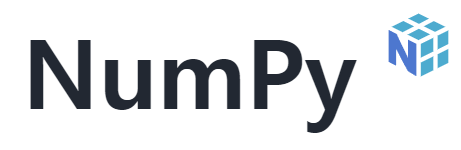

# 4장. 수치 연산이 쉬운 넘파이

## 학습 목표

* 배열과 리스트의 차이점을 알고 배열을 사용하는 이유를 이해한다.
* 배열을 생성하고 다루는 방법을 이해한다.
* 배열의 속성을 조회하고 인덱싱과 슬라이싱 개념을 이해한다.
* 배열의 연산 처리 개념을 이해한다.
* 배열의 다양한 형태로 변환하는 방법을 이해한다.


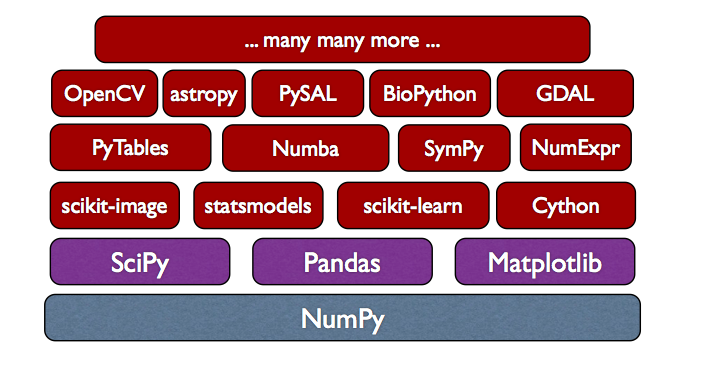

- Pandas, Scikit-learn, Tensorflow 등 데이터사이언스 분야에서 사용되는 라이브러리들의 기반으로 사용됨
- 넘파이(Numpy) 자체로도 높은 수준의 데이터 분석 기능을 제공

## 1. 넘파이 배열 개념 및 특징

### [파이썬 리스트(list)가 느린 이유]
- 파이썬 리스트는 포인터의 배열
- 경우에 따라서 각각의 요소가 메모리 여기저기 흩어져 있음으로 인해 캐시 활용이 어려움

### [넘파이 배열이 빠른 이유]
- 기본적으로 array 단위로 데이터를 관리하여 연산 수행
- 코어 부분이 C로 구현되어 동일한 연산을 하더라도 파이썬 기본 컬렉션 자료형을 사용하는 것에 비해 속도가 빠름
- 벡터화 연산을 이용하여 간단한 코드로 복잡한 선형 대수 연산 수행
- 배열 인덱싱을 사용한 질의를 이용하여 간단한 코드로 복잡한 수식 계산 가능
- 효율적인 메모리 사용이 가능하도록 구현됨

![Alt text](https://image.slidesharecdn.com/numpy20160519-160516164831/95/numpy-8-638.jpg)  
(출처: https://image.slidesharecdn.com/numpy20160519-160516164831/95/numpy-8-638.jpg)

### [파이썬 기본 자료형과 넘파이 비교]

In [1]:
# 이해하지 않아도 됩니다. 시간을 측정하기 위한 클래스 입니다.
import time
class Timer(object):
    def __init__(self, name=None):
        self.name = name

    def __enter__(self):
        self.tstart = time.time()

    def __exit__(self, type, value, traceback):
        if self.name:
            print('[%s]' % self.name)
        print('Elapsed: %s' % (time.time() - self.tstart))

In [3]:
# 크기가 100개 이내인 경우 NumPy는 순수 파이썬 구현 보다도 오히려 낮은 성능을 보이는 경향이 있습니다.

# rows ,cols가 2일떄 아래 타이머코드를 실행해 보고 rows, cols를 1000으로 바꾼 뒤 다시 코드를 실행 해 보세요.
# 차이를 볼 수 있습니다.
import numpy as np
rows = 1000  # 행
cols = 1000  # 열
sampleRand2Darray = np.random.rand(rows, cols)  # ndarry 선언
sampleRand2Dlist = sampleRand2Darray.tolist()   # nested list 선언

In [5]:
# rows, cols가 1000넘어갈땐 실행 하지 마세요. (컴퓨터 멈춥니다.)
sampleRand2Darray

array([[0.53588137, 0.03002147, 0.76695537, ..., 0.766149  , 0.30642922,
        0.72752235],
       [0.81517878, 0.16509178, 0.18780349, ..., 0.60435994, 0.42088386,
        0.09786264],
       [0.97831543, 0.0664981 , 0.90996222, ..., 0.97496005, 0.18504385,
        0.00768227],
       ...,
       [0.32931586, 0.67831185, 0.53948822, ..., 0.19045149, 0.10898305,
        0.24559703],
       [0.85860832, 0.88501817, 0.15521717, ..., 0.19829706, 0.56277422,
        0.97085561],
       [0.03927434, 0.78637056, 0.95861306, ..., 0.26982243, 0.09038351,
        0.69076158]])

In [ ]:
# rows, cols가 1000넘어갈땐 실행 하지 마세요. (컴퓨터 멈춥니다.)
sampleRand2Dlist

In [9]:
with Timer('파이썬 기본 자료형 사용 - 모든 원소의 합 구하기'):
  sum = 0

  for list in sampleRand2Dlist:
    for e in list:
      sum += e

with Timer('파이썬 기본 자료형 사용 - 모든 원소에 1 더하기'):
  sampleRand2Dlist2 = []

  for list in sampleRand2Dlist:
    tempList = []

    for e in list:
      tempList.append(e+1)

    sampleRand2Dlist2.append(tempList)

print("----------------------------------------------")

with Timer('NumPy사용 - 모든 원소의 합 구하기'):
  sum = np.sum(sampleRand2Darray)

with Timer('NumPy사용 - 모든 원소에 1 더하기'):
  sampleRand2Darray2 = sampleRand2Darray + 1       

[파이썬 기본 자료형 사용 - 모든 원소의 합 구하기]
Elapsed: 0.06000518798828125
[파이썬 기본 자료형 사용 - 모든 원소에 1 더하기]
Elapsed: 0.09533286094665527
----------------------------------------------
[NumPy사용 - 모든 원소의 합 구하기]
Elapsed: 0.0015239715576171875
[NumPy사용 - 모든 원소에 1 더하기]
Elapsed: 0.001528024673461914


### [넘파이 사용을 위한 준비]
* 설치 명령어 : **pip intall numpy**
* 아나콘다 패키지, 구글 코랩은 이미 설치가 되어 있음

### [넘파이 라이브러리 사용 선언]

In [1]:
# 넘파이 라이브러리를 로드하고 np라는 별명으로 사용
import numpy as np

## 2. 넘파이 배열 생성

* 다차원 배열을 지원함
* 데이터의 차원은 여러 갈래의 데이터 방향을 가지며 axis로 표현
  - 행 방향(높이) : axis = 0
  - 열 방향(폭) : axis = 1
  - 채널 방향(깊이) : axis = 2

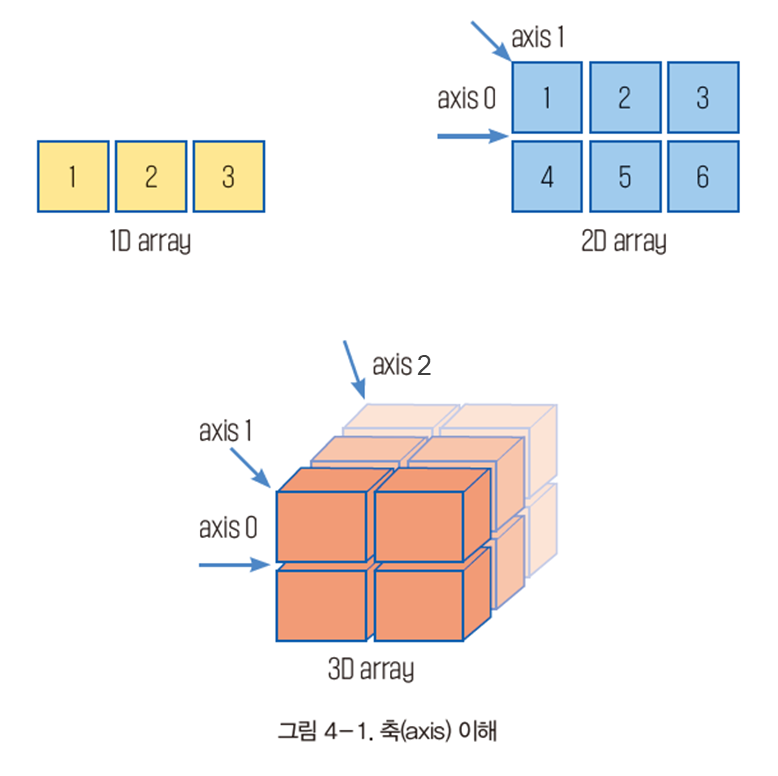

### 2.1 리스트로 배열 생성

* 넘파이의 array 함수에 리스트 또는 튜플을 추가하면 ndarray 클래스 객체(배열)로 변환
* 배열의 원소는 **동일한 데이터 타입**을 가져야 함

#### 실습 코드 4-1. 1차원 배열(list)로 numpy 배열 생성

In [1]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
print(arr)

[1 2 3 4 5]


#### 실습 코드 4-2. 2차원 배열(list)로 numpy 배열 생성

In [3]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
print(arr1)

[[1 2 3]
 [4 5 6]]


#### 실습 코드 4-3. 3차원 배열(list)로 numpy 배열 생성

In [5]:
arr2 = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                 [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                 [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
print(arr2)

[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]]


### 2.2 배열 생성 및 초기화

* 초기 플레이스홀더(Placeholder)를 이용해서 배열을 생성하고 특정 값으로 초기화

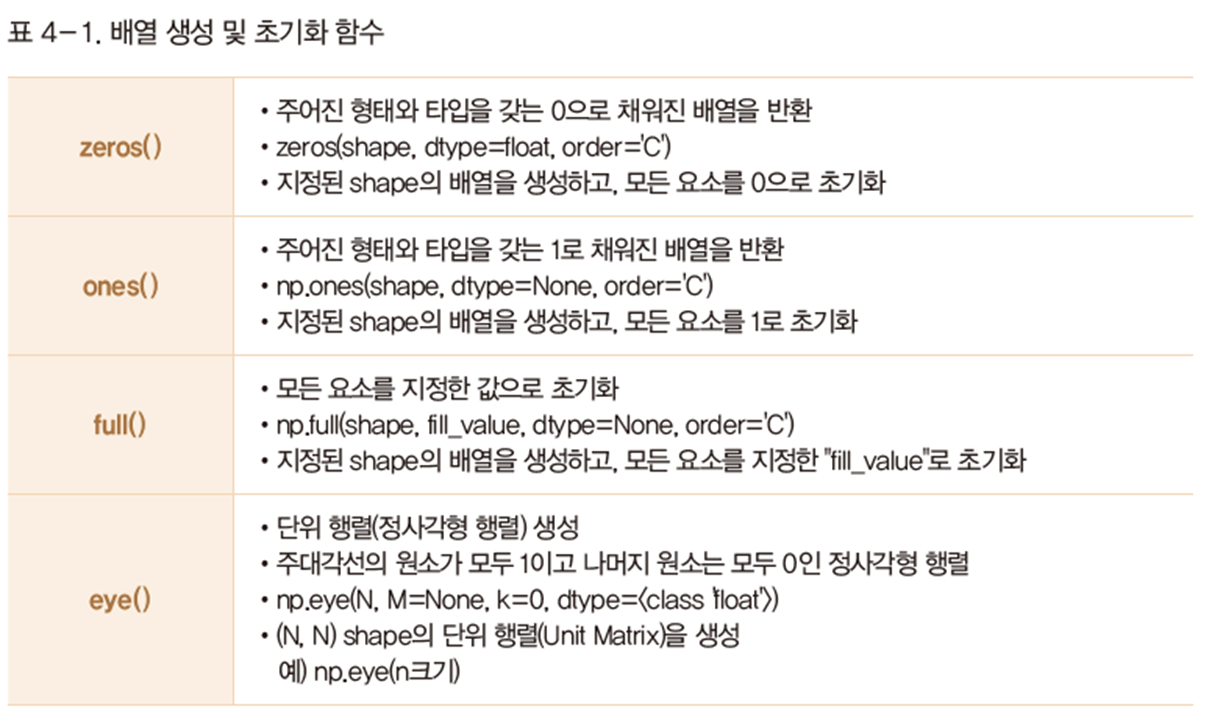

In [3]:
# 10개의 값을 가지는 1차원의 배열을 생성하고 0으로 값을 초기화
a = np.zeros(10)
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# 3 x 3개의 값을 가지는 2차원 배열을 생성하고 0으로 값을 초기화
b = np.zeros((3, 3))
print(b)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [11]:
# 10개의 값을 가지는 1차원의 배열을 생성하고 1로 값을 초기화
c = np.ones(10)
print(c)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
# 3 x 3개의 값을 가지는 2차원 배열을 생성하고 1로 값을 초기화
d = np.ones((3, 3))
print(d)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [15]:
# 3 x 3개의 값을 가지는 2차원 배열을 생성하고 모든 값을 1.5로 초기화
e = np.full((3, 3), 1.5)
print(e)

[[1.5 1.5 1.5]
 [1.5 1.5 1.5]
 [1.5 1.5 1.5]]


In [17]:
# 3 x 3의 단위 행렬 생성
f = np.eye(3)
print(f)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 2.3 생성한 값으로 배열 생성

* 주어진 조건으로 데이터를 생성한 후 배열을 만드는 데이터 생성 함수 제공
  - np.arange(), linspace(), logspace()

### [np.arange() 함수]

**numpy.arange([start,] stop[, step,], dtype=None)**
* start부터 stop 미만까지 step 간격으로 데이터를 가지는 배열을 생성
* 범위 내에서 간격을 기준 균등 간격의 배열
* 요소의 개수가 아닌 데이터의 간격을 기준으로 배열 생성

#### 실습 코드 4-4. arange() : 정수 범위로 배열 생성

In [5]:
a = np.arange(1, 21)
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [7]:
type(a)

numpy.ndarray

In [9]:
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [15]:
b = np.arange(0, 31)
print(a)
print(b)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


### [np.linspace() 함수]

**numpy.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None)**
* start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수* 
요소 개수를 기준으로 균등 간격의 배열을 생성


#### 실습 코드 4-5. linspace() : 범위 내에서 균등 간격의 배열 생성

In [17]:
c = np.linspace(0, 10, 5)
c

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

### [np.logspace() 함수]

**numpy.logspace(start, stop, num = 50, endpoint = True, base = 10.0, dtype = None)*** 로그 스케일의 linspace 함수* 
로그 스케일로 지정된 범위에서 num 개수만큼 균등 간격으로 데이터 생성한 후 배열 성


#### 실습 코드 4-6. logspace() : 범위 내에서 균등 간격으로 로그 스케일로 배열 생성

In [21]:
d = np.logspace(np.log10(10), np.log10(100), 5)
d

array([ 10.        ,  17.7827941 ,  31.6227766 ,  56.23413252,
       100.        ])

In [23]:
e = np.logspace(1, 2, 5)
e

array([ 10.        ,  17.7827941 ,  31.6227766 ,  56.23413252,
       100.        ])

### 2.4 난수 기반으로 배열 생성

* numpy.random 모듈에서 난수 발생 및 배열 생성 함수 제공
* numpy.random.seed(숫자) 함수
  - '무작위'가 포함된 작업의 완전한 재현을 가능하게끔 만들어주는 역할
  - '무작위' 결과를 특정한 값으로 고정할 수 있음

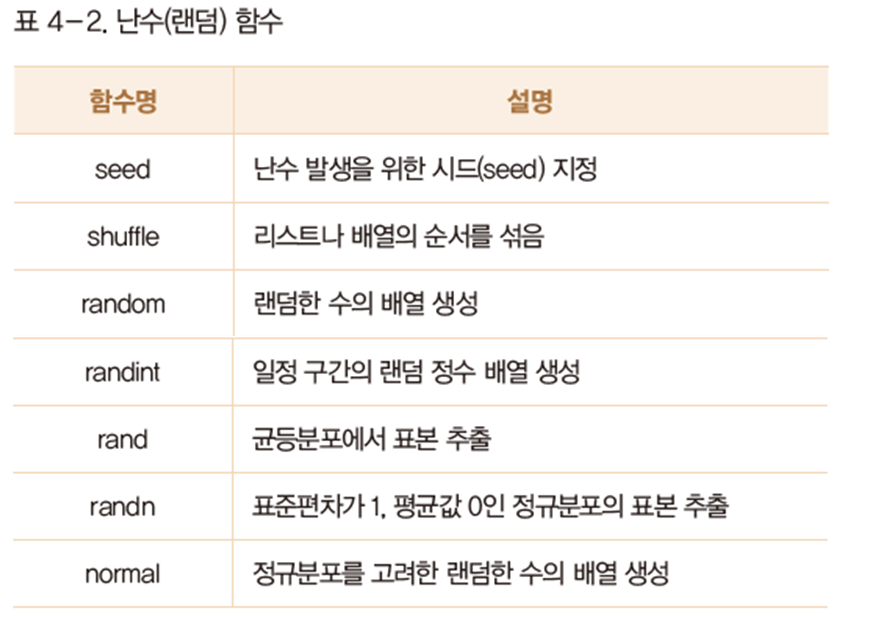

### [random() 함수]

**np.random.random(size = None)**
* 난수 : [0., 1.)의 균등 분포(Uniform Distribution)에서 표본 추출


#### 실습 코드 4-7. random : 랜덤한 수의 배열 생성

In [30]:
a=np.random.random()
print(a)

0.5140634022940921


In [32]:
b = np.random.random((4, 4))
b

array([[0.78075329, 0.48595963, 0.47390808, 0.96092437],
       [0.07392258, 0.39203281, 0.51194844, 0.50239855],
       [0.40629564, 0.8799419 , 0.16997261, 0.20360799],
       [0.21371752, 0.80607809, 0.68087361, 0.28531753]])

### [randint() 함수]

**numpy.random.randint(low, high = None, size = None, dtype = 'l')*** 지정된 shape로 배열을 만들고 low부터 high 미만의 범위에서 정수 표본 추출


#### 실습 코드 4-8. randint : 랜덤한 정수의 배열 생성

In [72]:
a=np.random.randint(1,10)
print(a)

7


In [76]:
b = np.random.randint(1, 10, (4, 4))
b

array([[8, 5, 2, 7],
       [6, 3, 8, 4],
       [5, 3, 5, 2],
       [2, 2, 8, 3]])

### [rand() 함수]

**numpy.random.rand(d0, d1, ..., dn)*** Shape이 (d0, d1, ..., dn) 인 배열 생성 후 난수로 초기화
* 난수 : [0. 1)의 균등 분포(Uniform Distribution) 형상으로 표본 추출


#### 실습 코드 4-9. rand : 균등분포를 고려한 랜덤한 수의 배열 생성

In [94]:
a=np.random.rand(3,3)
print(a)

[[0.94764022 0.29993501 0.82960295]
 [0.1040655  0.85595339 0.8622041 ]
 [0.44115394 0.84742385 0.56888892]]


#### [randn() 함수]

**numpy.random.randn(d0, d1, ..., dn)*** (d0, d1, ..., dn) shape 배열 생성 후 난수로 초기화
* 난수 : 표준 정규 분포(Standard Normal Distribution)에서 표본 추출추출

#### 실습 코드 4-10. randn : 표준 정규분포를 고려한 랜덤한 수의 배열 생성

In [100]:
a=np.random.randn(3,3)
print(a)

[[-0.41781899  2.14585872 -0.20108913]
 [ 0.50640492  1.08984598 -0.84438563]
 [ 1.15922867 -0.7396642   1.16783803]]


## 3. 넘파이 배열 조회

### 3.1 넘파이 표준 데이터 타입

* 배열을 생성할 때 **dtype 속성**으로 데이터 타입 지정 가능
  - 정수 : 8, 16, 32, 64비트 정수
    * np.int8, np.int16, np.int32, np.int64
  - 부동소수  : 16, 32, 64비트 부동소수
    * np.float16, np.float32, np.float64
  - 복소수 : 64, 128비트 복소수
    * np.complex64, np.complex128
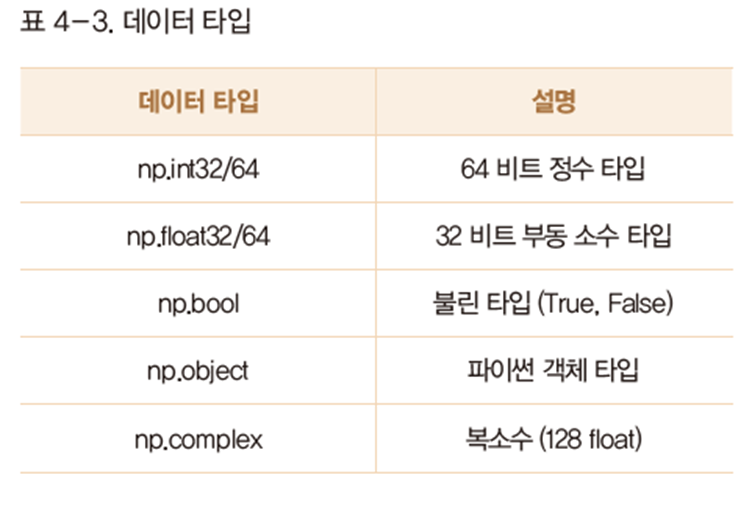

### 3.2 넘파이 배열 속성 정보

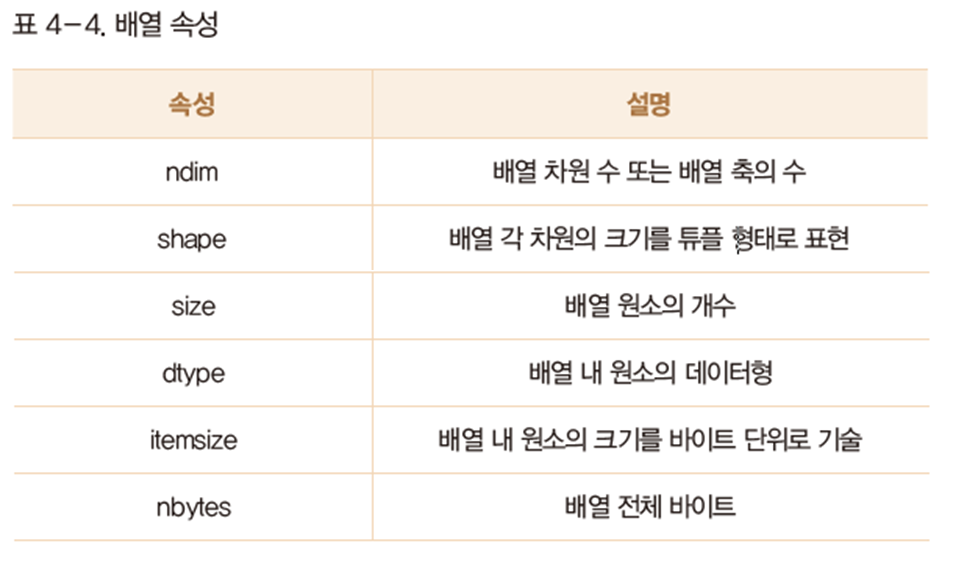

#### 실습 코드 4-11. 배열의 속성 알아보기

In [103]:
arr=np.arange(1,6)
print(arr)

[1 2 3 4 5]


In [105]:
print('ndim:', arr.ndim)  
print('shape:', arr.shape) 
print('dtype:', arr.dtype) 
print('size:', arr.size) 
print('itemsize:', arr.itemsize) 
print('nbytes:', arr.nbytes)

ndim: 1
shape: (5,)
dtype: int32
size: 5
itemsize: 4
nbytes: 20


### 3.3 배열의 인덱싱

* 배열의 각 요소는 axis별 인덱스 배열로 참조
  - 1차원 배열 : 1개 인덱스, 2차원 배열 : 2개 인덱스, 3차원 배열 : 3개 인덱스
* 참조한 요소는 값 참조 및 수정 모두 가능

#### 실습 코드 4-12. 1차원 배열의 인덱싱 및 변경

In [107]:
a1 = np.arange(9) # 1차원 배열
print(a1)

[0 1 2 3 4 5 6 7 8]


In [109]:
print(a1[0])
print(a1[-1])
a1[0]=10 # 요소변경
print(a1)

0
8
[10  1  2  3  4  5  6  7  8]


#### 실습 코드 4-13. 2차원 배열의 인덱싱 및 변경

In [111]:
a2 = np.arange(9).reshape((3, 3)) #2차원 배열
print(a2)


[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [113]:
print(a2[0, 1]) # 1행 두번째 컬럼 요소 참조
print(a2[1, 2]) # 2행 세번째 컬럼 요소 참조
a2[0, 0] = 10 # 1행 첫번째 컬럼 업데이트
print(a2)

1
5
[[10  1  2]
 [ 3  4  5]
 [ 6  7  8]]


### 3.4 배열의 슬라이싱

* 축(axis)별로 범위를 지정하여 부분 배열 생성
  - 연속된 값을 가져오기 때문에 결과로 얻어지는 배열은 언제나 원본의 부분 배열
* 슬라이싱은 원본 배열의 뷰(view)이기 때문에 슬라이싱 결과의 요소를 업데이트하면 원본에 반영

#### 실습 코드 4-14. 1차원 배열의 슬라이싱

In [115]:
a1= np.arange(6)
print(a1)


[0 1 2 3 4 5]


In [117]:
print(a1[0:3])
print(a1[1:])
print(a1[-2:])
print(a1[:-3])
print(a1[::2])
print(a1[::-1])

[0 1 2]
[1 2 3 4 5]
[4 5]
[0 1 2]
[0 2 4]
[5 4 3 2 1 0]


#### 실습 코드 4-15. 2차원 배열의 슬라이싱

In [119]:
a2 = np.arange(1, 25).reshape((4, 6)) #2차원 배열
print(a2)


[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]


In [123]:
print(a2[1])
print(a2[1:3, 1:5])
print(a2[2, :])
print(a2[:3, :3])
print(a2[2:, ::-1])
print(a2[::-1, ::-1])

[ 7  8  9 10 11 12]
[[ 8  9 10 11]
 [14 15 16 17]]
[13 14 15 16 17 18]
[[ 1  2  3]
 [ 7  8  9]
 [13 14 15]]
[[18 17 16 15 14 13]
 [24 23 22 21 20 19]]
[[24 23 22 21 20 19]
 [18 17 16 15 14 13]
 [12 11 10  9  8  7]
 [ 6  5  4  3  2  1]]


### 3.5 논리 인덱싱

* 배열 각 요소의 선택 여부 불린(True or False)을 지정
* 해당 인덱스의 True만 조회 (조건에 맞는 배열 속 요소를 취사 선택할 때 사용)

#### 실습 코드 4-16. 불린 인덱싱 개념

In [125]:
a=np.arange(1,6)
print(a)


[1 2 3 4 5]


In [127]:
b=[True,False,False,True,False]
print(b)

[True, False, False, True, False]


In [ ]:
print(a[b])

#### 실습 코드 4-17. 불린 인덱싱 : 비교 연산자 사용

In [129]:
a=np.arange(11)
print(a[a<5])


[0 1 2 3 4]


In [131]:
five_up=(a>=5)
print(five_up)
print(a[five_up])


[False False False False False  True  True  True  True  True  True]
[ 5  6  7  8  9 10]


#### 실습 코드 4-18. 불린 인덱싱 : 관계 연산자 사용

In [133]:
# 논리연산자 사용( &, | ~)
c = a[(a > 5) & (a < 11)] # and
print(c)
d=a[(a > 9) | (a < 5)]  # or
print(d)


[ 6  7  8  9 10]
[ 0  1  2  3  4 10]


In [135]:
e = a[~(a%3==0)]
print(e)

[ 1  2  4  5  7  8 10]


## 4. 배열의 연산

### 4.1 배열의 일반 연산

* 기본 연산자를 연산자 재정의하여 배열(행렬) 연산을 직관적으로 표현
* 다차원 배열 간 연산시, **shape이 맞아야** 연산이 이루어짐
  - 요소별 합, 차, 곱, 나눗셈의 경우 shape이 일치해야 함
  - 벡터의 내적, 벡터와 행렬의 곱, 행렬곱 연산의 경우 앞 배열의 열과 뒤 배열의 행의 크기가 일치해야 함

### [산술 연산(Arithmetic Operation)]

#### 실습 코드 4-19. 산술 연산 : 사칙연산 연산자와 함수 활용

In [139]:
a=np.arange(1,11) # [1, 2, 3, ..., 10]
b=np.arange(1,11) # [1, 2, 3, ..., 10]

print(a+b)
# 덧셈함수

print(a-b)
# 뺄셈함수

print(a*b)
# 곱셈함수

print(a/b)
# 나눗셈함수


[ 2  4  6  8 10 12 14 16 18 20]
[0 0 0 0 0 0 0 0 0 0]
[  1   4   9  16  25  36  49  64  81 100]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [141]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# 벡터의 내적; 둘 다 결과는 219
print(v.dot(w))
print(np.dot(v, w))

# 행렬과 벡터의 곱; 둘 다 결과는 dimension 1인 배열 [29 67]
print(x.dot(v))
print(np.dot(x, v))

# 행렬곱; 둘 다 결과는 dimension 2인 배열
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


#### 실습 코드 4-20. 기타 연산 : 지수/제곱근/sin/cos/tan/log

In [143]:
a=np.arange(1,11) # [1, 2, 3, ..., 10]
print(np.exp(a)) # 지수 연산
print(np.sqrt(a)) # 루트 연산
print(np.sin(a))
print(np.cos(a))
print(np.tan(a))
print(np.log(a))

[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04]
[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]
[ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825  0.41211849 -0.54402111]
[ 0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219  0.96017029
  0.75390225 -0.14550003 -0.91113026 -0.83907153]
[ 1.55740772 -2.18503986 -0.14254654  1.15782128 -3.38051501 -0.29100619
  0.87144798 -6.79971146 -0.45231566  0.64836083]
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]


### [집계 함수(Aggregate Function)]

* **Case 1 : axis = None**
  - 전체 행렬을 하나의 배열로 간주하고 집계 함수의 범위를 전체 행렬로 정의
* **Case 2 : axis = 0**
  - 행을 기준으로 각 행의 동일 인덱스의 요소를 그룹
  - 각 그룹을 집계 함수의 범위로 정의
* **Case 3 : axis = 1**
  - 열을 기준으로 각 열의 요소를 그룹
  - 각 그룹을 집계 함수의 범위로 정의
 
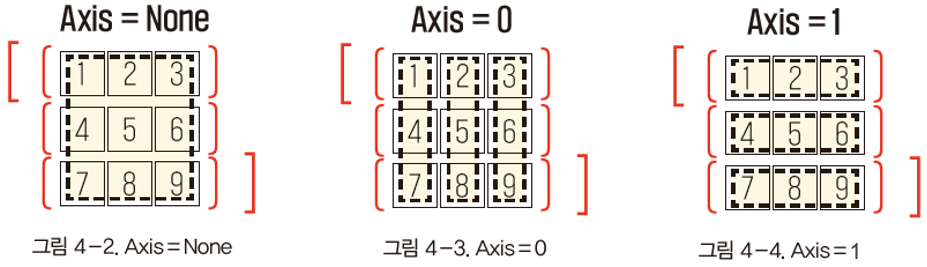

#### 실습 코드 4-21. 합계 : [ndarray 배열 객체].sum(), np.sum()

In [145]:
a=np.arange(1,10).reshape(3,3)
print(a.sum())
print(np.sum(a))
print(a)


45
45
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [147]:
b=a.sum(axis=0)
print(b)
c=a.sum(axis=1)
print(c)

[12 15 18]
[ 6 15 24]


#### 실습 코드 4-22. 최대값 : [ndarray 배열 객체].max(), np.max()

In [149]:
a=np.arange(1,10).reshape(3,3)
print(a)


[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [151]:
print(a.max(),np.max(a))
print(a.max(axis=0), np.max(a,axis=0))
print(a.max(axis=1),np.max(a,axis=1))


9 9
[7 8 9] [7 8 9]
[3 6 9] [3 6 9]


#### 실습 코드 4-23. 최소값 : [ndarray 배열 객체].min(), np.min()

In [153]:
a=np.arange(1,10).reshape(3,3)
print(a)
print(a.min(),np.min(a))
print(a.min(axis=0), np.min(a,axis=0))
print(a.min(axis=1),np.min(a,axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
1 1
[1 2 3] [1 2 3]
[1 4 7] [1 4 7]


#### 실습 코드 4-24. 평균과 중앙값 : [ndarray 배열 객체].mean(), np.mean() / np.median()

In [155]:
a=np.arange(1,10).reshape(3,3)
print(a)
print(a.mean(),np.mean(a))
print(a.mean(axis=0),np.mean(a,axis=0))
print(a.mean(axis=1),np.mean(a,axis=1))
print(np.median(a)) # 중앙값

[[1 2 3]
 [4 5 6]
 [7 8 9]]
5.0 5.0
[4. 5. 6.] [4. 5. 6.]
[2. 5. 8.] [2. 5. 8.]
5.0


#### 실습 코드 4-25. 표준편차 : [ndarray 배열 객체].std(), np.std() : 표준편차

In [157]:
a=np.arange(1,10).reshape(3,3)
print(a)
print(a.std(), np.std(a))
print(a.std(axis=0), np.std(a,axis=0))
print(a.std(axis=1), np.std(a,axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
2.581988897471611 2.581988897471611
[2.44948974 2.44948974 2.44948974] [2.44948974 2.44948974 2.44948974]
[0.81649658 0.81649658 0.81649658] [0.81649658 0.81649658 0.81649658]


### 4.2 브로드캐스팅(Broadcasting) 연산

* 넘파이에서 shape이 다른 배열 간에도 산술 연산이 가능하게 하는 매커니즘
  - 원칙 : 다차원 배열의 산술연산(합, 차, 곱, 나눗셈)을 할 때 shape이 일치해야 함
* 조건만 만족한다면 모양이 다른 배열끼리 연산도 가능하게 해주며, 모양이 부족한 부분은 확장하여 연산을 수행

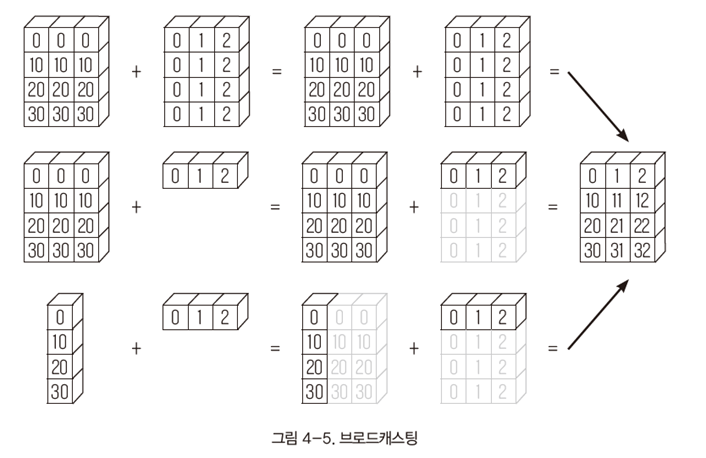

#### 실습 코드 4-26. 브로드캐스팅 개념

In [161]:
# 브로드캐스팅 사용하지 않은 경우
x=np.array([1,2,3,4,5])
y=np.array([1,1,1,1,1])
print(x+y)


[2 3 4 5 6]


In [163]:
# 브로드캐스팅을 사용한 경우
y = 1
print(x + y)

[2 3 4 5 6]


### [Shape가 다른 두 배열의 연산]

* Shape이 다른 두 배열 사이의 이항 연산에서 브로드캐스팅 발생
* 두 배열을 같은 shape으로 만든 후 연산을 수행

#### **Case 1 : 배열과 스칼라**

#### 실습 코드 4-27. shape가 다른 두 배열의 연산

In [165]:
a=np.arange(1,25).reshape(4,6)
print(a+100) # 브로드캐스팅

[[101 102 103 104 105 106]
 [107 108 109 110 111 112]
 [113 114 115 116 117 118]
 [119 120 121 122 123 124]]


In [169]:
# step1 : 스칼라 배열 변경
new_arr=np.full_like(a,100)
print(new_arr)
# step2 : 배열 이항 연산
print(a + new_arr)

[[100 100 100 100 100 100]
 [100 100 100 100 100 100]
 [100 100 100 100 100 100]
 [100 100 100 100 100 100]]
[[101 102 103 104 105 106]
 [107 108 109 110 111 112]
 [113 114 115 116 117 118]
 [119 120 121 122 123 124]]


#### **Case 2 : Shape이 다른 배열들의 연산**

#### 실습 코드 4-28. shape가 다른 두 배열의 연산

In [173]:
a = np.arange(5).reshape((1, 5))
print(a)
b = np.arange(5).reshape((5, 1))
print(b)


[[0 1 2 3 4]]
[[0]
 [1]
 [2]
 [3]
 [4]]


In [175]:
# 브로드캐스팅
print(a+b)

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]]


### 4.3 백터 연산

* 배열 처리에 대한 벡터 연산을 적용할 경우 처리 속도가 100배 이상 향상

#### 실습 코드 4-29. 벡터 연산 수행시간 비교

In [177]:
import numpy as np
import time

a = np.arange(10000000)
result = 0
s=time.time()
for v in a:
  result += v
e=time.time()
print(result, e-s) # 
s=time.time()
result=np.sum(a)
e=time.time()
print(result, e-s) # 백터연산 

C:\Users\D503\AppData\Local\Temp\ipykernel_5584\1592184455.py:8: RuntimeWarning: overflow encountered in scalar add
  result += v


-2014260032 0.9070501327514648
-2014260032 0.0030460357666015625


## 5. 배열 변환

* 배열 변환 방법 : 전치, 배열 shape 변환, 배열 요소 추가와 삭제, 배열 결합, 배열 분리 등

### 5.1 전치(Transpose)

### [numpy.ndarray 객체].T 또는 [numpy.ndarray 객체].transpose()
* 행렬의 행과 열을 교환하여 새로운 행렬을 생성

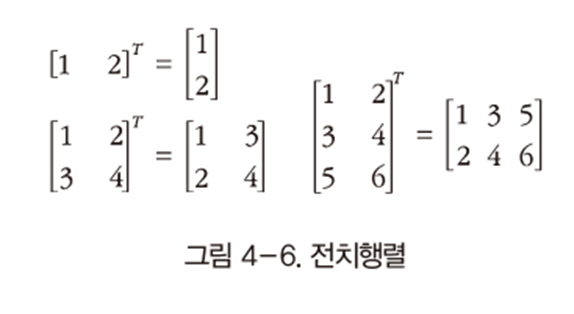

#### 실습 코드 4-30. 전치 행렬 생성

In [1]:
import numpy as np

In [3]:
a = np.random.randint(1,10,(3,3))
print(a)

[[5 1 9]
 [4 1 4]
 [9 4 2]]


In [5]:
# 전치행렬 생성 방법 1
print(a.T)

[[5 4 9]
 [1 1 4]
 [9 4 2]]


In [7]:
# 전치행렬 생성 방법 2
a.transpose()

array([[5, 4, 9],
       [1, 1, 4],
       [9, 4, 2]])

### 5.2 배열 형태 변경

### [numpy.ndarray 객체].ravel()
* 배열의 shape을 1차원 배열로 변환
* numpy.ndarray 배열 객체의 뷰를 반환
  - ravel() 메소드가 반환하는 배열의 요소를 수정하면 **원본 배열 요소에도 반영됨**
### [numpy.ndarray 객체].flatten()
* 배열의 shape을 1차원 배열로 변환
* 원본 배열의 복사본을 반환하기 때문에 요소를 수정해도 원본 배열에 영향이 가지 않음

#### 실습 코드 4-31. 배열을 1차원 배열로 변환

In [9]:
a = np.array([[1,2,3],[4,5,6]])
print(a)

# 배열 형태 변경 작업
b = a.ravel()
c = a.flatten()
b[0] = 10

print(b)
print(a) # b 배열 변경이 a 행렬에 반영됨
print(c)

[[1 2 3]
 [4 5 6]]
[10  2  3  4  5  6]
[[10  2  3]
 [ 4  5  6]]
[1 2 3 4 5 6]


### [numpy.ndarray 객체].reshape()
* 데이터 변경 없이 지정된 shape으로 배열 형태 변환
* 데이터의 개수와 형태의 크기는 동일해야 함
* 변환된 배열은 원래 배열과 동일한 메모리를 공유하기 때문에 한 배열에서 데이터를 변경하면 다른 배열의 데이터도 같이 수정됨

#### 실습 코드 4-32. shape 변경 : reshape 함수

In [13]:
x=np.arange(20)
y=x.reshape(4,5)
print(y)
x[0]=10
print(x)
print(y) 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[10  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[10  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


* ndarray가 아닌 다른 자료(list, tuple, range)를 바로 reshape하면 오류 발생
  - np.array() 함수를 이용하여 numpy.ndarray 객체로 변환 후 reshape 실행

#### 실습 코드 4-33. 다차원 list data를 reshape하기 : np.array()

In [17]:
list_data = [1,2,3,4,5,6] ## type : 파이썬의 기본 리스트(list) 타입
list_data.reshape(3,2)

AttributeError: 'list' object has no attribute 'reshape'

In [19]:
list_data = [1,2,3,4,5,6] ## type : 파이썬의 기본 리스트(list) 타입

# 리스트를 ndarray 타입으로 먼저 변경
data = np.array(list_data)
type(data)

numpy.ndarray

In [25]:
data = data.reshape(3, 2)
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [27]:
list_data

[1, 2, 3, 4, 5, 6]

### 5.3 배열 요소 추가 및 삭제

### [numpy.ndarray 객체].resize()
**np.resize(a, new_shape), np.ndarray.resize(new_shape, refcheck = True)**
* 배열의 shape와 크기를 변경

* reshape vs. resize
  - reshape : 배열 요소 수를 변경하지 않기 때문에 reshape 전후 배열의 요소 수 동일
  - resize : shape 변경하는 과정에서 배열 요소 수를 줄이거나 늘림

#### 실습 코드 4-34. shape 변경하기 : resize 함수 - 요소 수가 동일한 경우는 reshape()과 동일

In [29]:
x=np.arange(20) # x = [0, 1, 2, ..., 19]
y=np.resize(x,(5,4))
y

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

#### 실습 코드 4-35. shape 변경하기 : resize 함수 - 요소 수가 더 많은 경우
* 원래 가지고 있는 배열의 데이터 반복되고 오류 발생하지 않음

In [31]:
x=np.arange(20) # x = [0, 1, 2, ..., 19]
y=np.resize(x,(5,6))
y

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  8,  9]])

#### 실습 코드 4-36. shape 변경하기 : resize 함수 - 요소 수가 더 적은 경우
* 새 배열을 채우는 데 필요한 요소 수를 행 순서대로 가져옴

In [33]:
x=np.arange(20) # x = [0, 1, 2, ..., 19]
y=np.resize(x,(5,3))
y

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

#### 실습 코드 4-37. shape 변경하기 : resize 함수와 reshape 함수 큰 차이점
* 원래 배열과 동일 한 메모리를 공유하지 않기 때문에 한 배열의 데이터 변경은 다른 배열에 적용되지 않음

In [35]:
x=np.arange(20) # x = [0, 1, 2, ..., 19]
y=np.resize(x,(4,5))
print(y)
x[0]=10
print(x)
print(y)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[10  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


### [numpy.ndarray 객체].append()
**np.append(arr, values, axis = None)**
* 배열의 끝에 요소(값 또는 배열)를 추가
* axis로 배열이 추가되는 방향 지정

#### 실습 코드 4-38. 값 추가

In [37]:
a = np.arange(3) # a = [0 1 2]
b = np.append(a, 3) # b = [0 1 2]에 3을 추가
print(b)

[0 1 2 3]


#### 실습 코드 4-39. 배열 추가
* axis를 지정하지 않으면 1차원 배열로 변환(flatten)되어 추가

In [39]:
a = np.array([[1, 2, 3], [4, 5, 6]]) # 2행 3열의 배열 생성
b = np.array([[7, 8, 9]]) # 1행 3열의 배열 생성
c = np.append(a, b)
print(c)

[1 2 3 4 5 6 7 8 9]


#### 실습 코드 4-40. 축(axis) 추가
* 첫 번째 축(axis = 0)을 기준으로 추가해서 2차원 배열 반환

In [45]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9]])
c = np.append(a, b, axis=0)
print(c)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### [numpy.ndarray 객체].insert()

**np.insert(arr, obj, values, axis = None)**
* 지정한 인덱스에 요소를 삽입
  - arr : 입력 배열
  - obj : 값 추가 전 인덱스를 지정하는 개체 삽입
  - values : 추가할 값
  - axis : 계산이 진행되는 축 설정
* axis를 지정하지 않으면 1차원 배열로 변환

#### 실습 코드 4-41. 값 추가 : 1차원 배열

In [47]:
a = np.array([1, 2, 3])
b = np.insert(a, 1, 5) # [1, 5, 2, 3]

print(a)
print(b)

[1 2 3]
[1 5 2 3]


#### 실습 코드 4-42. 값 추가 : 2차원 배열
* 축(axis)을 지정하지 않았기 때문에 1차원 배열로 변환한 후 값을 삽입

In [49]:
a = np.array([[1, 1], [2, 2], [3, 3]])
b = np.insert(a, 1, 5) # [1, 1, 2, 2, 3, 3] ==> [1, 5, 2, 2, 3, 3]
print(a)
print(b)

[[1 1]
 [2 2]
 [3 3]]
[1 5 1 2 2 3 3]


#### 실습 코드 4-43. 값 추가 : 축 지정

In [51]:
a = np.array([[1, 1], [2, 2], [3, 3]])
b = np.insert(a, 1, 5, axis=0)
c = np.insert(a, 1, 5, axis=1)
print(a)
print(b)
print(c)

[[1 1]
 [2 2]
 [3 3]]
[[1 1]
 [5 5]
 [2 2]
 [3 3]]
[[1 5 1]
 [2 5 2]
 [3 5 3]]


### [numpy.ndarray 객체].delete()

**np.delete(arr, obj, axis = None)**
* 지정한 인덱스의 요소를 삭제
  - arr : 입력 배열
  - obj : 값 추가 전 인덱스를 지정하는 개체 삽입(slice or index)
  - axis : 계산이 진행되는 축 설정
* axis를 지정하지 않으면 1차원 배열로 변환
* 원본 배열을 변경하지 않으며 새로운 배열을 반환

#### 실습 코드 4-44. 값 삭제
* 축(axis)이 지정되지 않으면 1차원으로 변환된 배열에서 **지정한 인덱스**의 값을 삭제

In [58]:
a = np.arange(1, 13).reshape(3,4)
print(a)
print(np.delete(a, 5))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[ 1  2  3  4  5  7  8  9 10 11 12]


#### 실습 코드 4-45. 값 삭제 : 축 지정

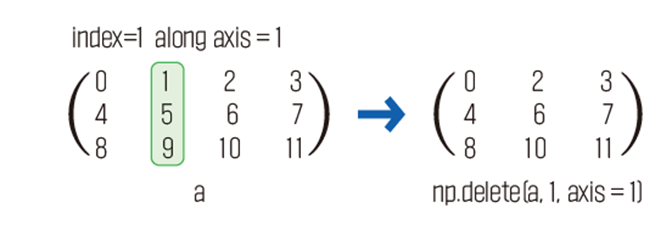

In [60]:
a = np.arange(12).reshape(3,4)
print(a)
print(np.delete(a, 1, axis=0))
print(np.delete(a, 1, axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[[ 0  2  3]
 [ 4  6  7]
 [ 8 10 11]]


### 5.4 배열 결합

### [numpy.ndarray 객체].concatenate()

**np.concatenate((a1, a2, ...), axis = 0)**
* 지정한 배열들을 선택한 축(axis)의 방향으로 합쳐서 연
  - a1, a2, ... : 합칠 배열들
  - axis : 합칠 방향을 지정하는 축

#### 실습 코드 4-46. 배열 결합

In [62]:
a1 = np.array([1, 2, 3])
a2 = np.array([4, 5, 6])
arr = np.concatenate((a1, a2))
print(arr)

[1 2 3 4 5 6]


#### 실습 코드 4-47. 배열 결합 : 축 지정
* axis = 0 : 행 방향 (위 -> 아래) 연결
* axis = 1 : 열 방향 (좌 -> 우) 연결

In [64]:
a1 = np.array([[1, 2, 3]])
a2 = np.array([[4, 5, 6]])

axis0 = np.concatenate((a1, a2), axis=0)
print(axis0)

[[1 2 3]
 [4 5 6]]


In [66]:
axis1 = np.concatenate((a1, a2), axis=1)
print(axis1)

[[1 2 3 4 5 6]]


### [numpy.ndarray 객체].vstack()

**np.vstack(tup)**
* 튜플로 설정된 여러 배열을 수직 방향으로 연결 (axis = 0 방향)
  - tup : 튜플
* np.concatenate(tup, axis = 0)과 동일

#### 실습 코드 4-48. 수직 방향 배열 결합

In [68]:
a1 = np.array([1, 2, 3])
a2 = np.array([4, 5, 6])
np.vstack((a1,a2))

array([[1, 2, 3],
       [4, 5, 6]])

### [numpy.ndarray 객체].hstack()

**np.hstack(tup)**
* 튜플로 설정된 여러 배열을 수평 방향으로 연결 (axis = 1 방향)
  - tup : 튜플
* np.concatenate(tup, axis = 1)과 동일

#### 실습 코드 4-49. 수평 방향 배열 결합

In [70]:
a1 = np.array([1, 2, 3])
a2 = np.array([4, 5, 6])
np.hstack((a1,a2))

array([1, 2, 3, 4, 5, 6])

### 5.5 배열 분리
* **np.hsplit()** : 지정한 배열을 수평(열) 방향으로 분할
* **np.vsplit()** : 지정한 배열을 수직(행) 방향으로 분할

### [numpy.ndarray 객체].hsplit()

**np.hsplit(arr, x)**
* 배열을 세로로 x개가 되도록 분할
  - arr : 분리 대상 배열
  - x : 분할할 개수
* 결과 값은 리스트 형태로 반환

#### 실습 코드 4-50. 수평 방향 배열 분리

In [72]:
a = np.arange(16).reshape(4, 4)
a_hsplit = np.hsplit(a, 2)
print(a)
print(a_hsplit)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])]


### [numpy.ndarray 객체].vsplit()

**np.vsplit(arr, x)**
* 배열을 가로로 x개가 되도록 분할
  - arr : 분리 대상 배열
  - x : 분할할 개수
* 결과 값은 리스트 형태로 반환

#### 실습 코드 4-51. 수직 방향 배열 분리

In [74]:
a = np.arange(16).reshape(4, 4)
a_vsplit = np.vsplit(a, 2)
print(a)
print(a_vsplit)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])]
